In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library

#import plotly.plotly as py # visualization library
#import plotly.graph_objs as go # plotly graphical object
#from plotly.offline import init_notebook_mode, iplot # plotly offline mode
#init_notebook_mode(connected=True) 
import pandas as pd
from pathlib import Path


import kagglehub
path = kagglehub.dataset_download("usaf/world-war-ii")
aerial = pd.read_csv ((Path (path) / Path("operations.csv")))

aerial

C:\Users\Arath\AppData\Local\Temp\ipykernel_32120\2000077935.py:20: DtypeWarning: Columns (7,8,11,13,31,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  aerial = pd.read_csv ((Path (path) / Path("operations.csv")))


,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,178738,2/16/1945,CBI,USA,10 AF,89 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35815.0
178277,178739,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35020.0
178278,178740,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35022.0
178279,178741,2/16/1945,PTO,NEW ZEALAND,RNZAF,NO. 22 SQUADRON RNZAF,F4U,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8000.0,4.0,NaN,NaN,NaN


1. Which day had most missions?

In [88]:


aerial_mission_date = aerial.groupby("Mission Date")["Mission ID"].count()
aerial_mission_date_df = aerial_mission_date.reset_index()
aerial_mission_date_df.columns = ["Mission Date", "Number of Missions"]
pd.DataFrame(aerial_mission_date_df).sort_values(by = "Number of Missions", ascending = False)


,Mission Date,Number of Missions
556,4/18/1942,52
951,9/1/1942,20
969,9/15/1943,15
792,7/11/1943,13
128,10/22/1942,12
...,...,...
244,12/12/1941,1
245,12/12/1942,1
660,5/15/1944,1
659,5/15/1942,1


In [92]:
# Ensure "Mission Date" is in datetime format
aerial["Mission Date"] = pd.to_datetime(aerial["Mission Date"])

aerial["Year-Month"] = aerial["Mission Date"].dt.to_period("M")

missions_per_month = aerial.groupby("Year-Month")["Mission ID"].count()

missions_per_month_df = missions_per_month.reset_index()

missions_per_month_df.columns = ["Month", "Number of Missions"]

missions_per_month_df = missions_per_month_df.sort_values(by="Number of Missions", ascending=False)

pd.DataFrame (missions_per_month_df.head(10))

,Month,Number of Missions
43,1944-01,163
37,1943-07,160
46,1944-04,129
47,1944-05,121
38,1943-08,116
42,1943-12,107
28,1942-10,100
33,1943-03,100
39,1943-09,100
14,1941-04,91


In [78]:
aerial = aerial[pd.isna(aerial.Country)==False]
aerial = aerial[pd.isna(aerial['Target Longitude'])==False]
aerial = aerial[pd.isna(aerial['Takeoff Longitude'])==False]

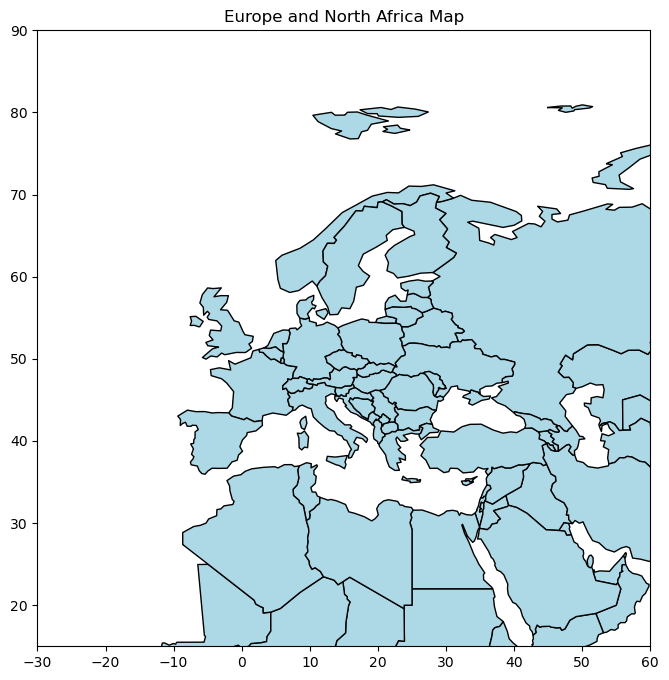

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
# Load natural earth data for countries
world = gpd.read_file(Path("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"))

# Filter for Europe and North Africa based on coordinates
europe_north_africa = world.cx[0:120, 0:90]  # Longitude: -30 to 60, Latitude: 15 to 50

# Plot the filtered map
fig, ax = plt.subplots(figsize=(10, 8))
europe_north_africa.plot(ax=ax, color="lightblue", edgecolor="black")
ax.set_xlim(-30, 60)  # Longitude range
ax.set_ylim(15, 90)   # Latitude range
ax.set_title("Europe and North Africa Map")
plt.show()